# Loan Prediction with Random Forest

## Problem Statement 8 (Submitted by :Rameez - )

The retail marketing department of a bank is planning to develop campaigns that more effectively target potential loan customers. The goal is to increase the conversion rate with minimal budget expenditure. To support this, the department seeks to build a predictive model to identify depositors with a high probability of purchasing a consumer loan. This model will enhance campaign efficiency by focusing efforts on customers most likely to convert, thereby increasing the success ratio and reducing campaign costs.

The dataset contains information on customers' financial profiles, including their demographics, financial products, and services usage. This data can be used for various analytical purposes, such as understanding customer behaviour, financial product usage, and creditworthiness.

The objective is to build a machine learning classification model to predict whether the customer will purchase consumer loan or not.

## 1. Import Libraries

In [ ]:
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library for creating visualizations
import seaborn as sns # Import the seaborn library for enhanced statistical visualizations

from sklearn.model_selection import train_test_split # Import train_test_split for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report # Import various metrics for model evaluation

from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import confusion_matrix and ConfusionMatrixDisplay for visualizing the confusion matrix
from sklearn.metrics import roc_curve # Import roc_curve for generating the ROC curve

## 2.Data Visualization and Exploration

### Load the dataset and display its first 5 rows, description, and shape.

**Description**:
Load the dataset into a pandas DataFrame and display its head, description, and shape to understand its structure and basic statistics.

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("Customer_Financial_Info.csv")

# Print the first 5 rows of the DataFrame for a sanity check
print("First 5 rows of the DataFrame:")
display(df.head())

# Print the description of the DataFrame to see statistical summary of numerical columns
print("\nDescription of the DataFrame:")
display(df.describe())

# Print the shape of the DataFrame to see the number of rows and columns
print("\nShape of the DataFrame:")
print(df.shape)

First 5 rows of the DataFrame:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



Description of the DataFrame:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



Shape of the DataFrame:
(5000, 14)


## Data visualization and correlation analysis

### Perform and visualize correlation analysis, including a justification of its effect on feature selection.

**Description**:
Calculate and display the correlation matrix using a heatmap to visualize relationships between features and then add a markdown cell to justify how correlation analysis can inform feature selection.

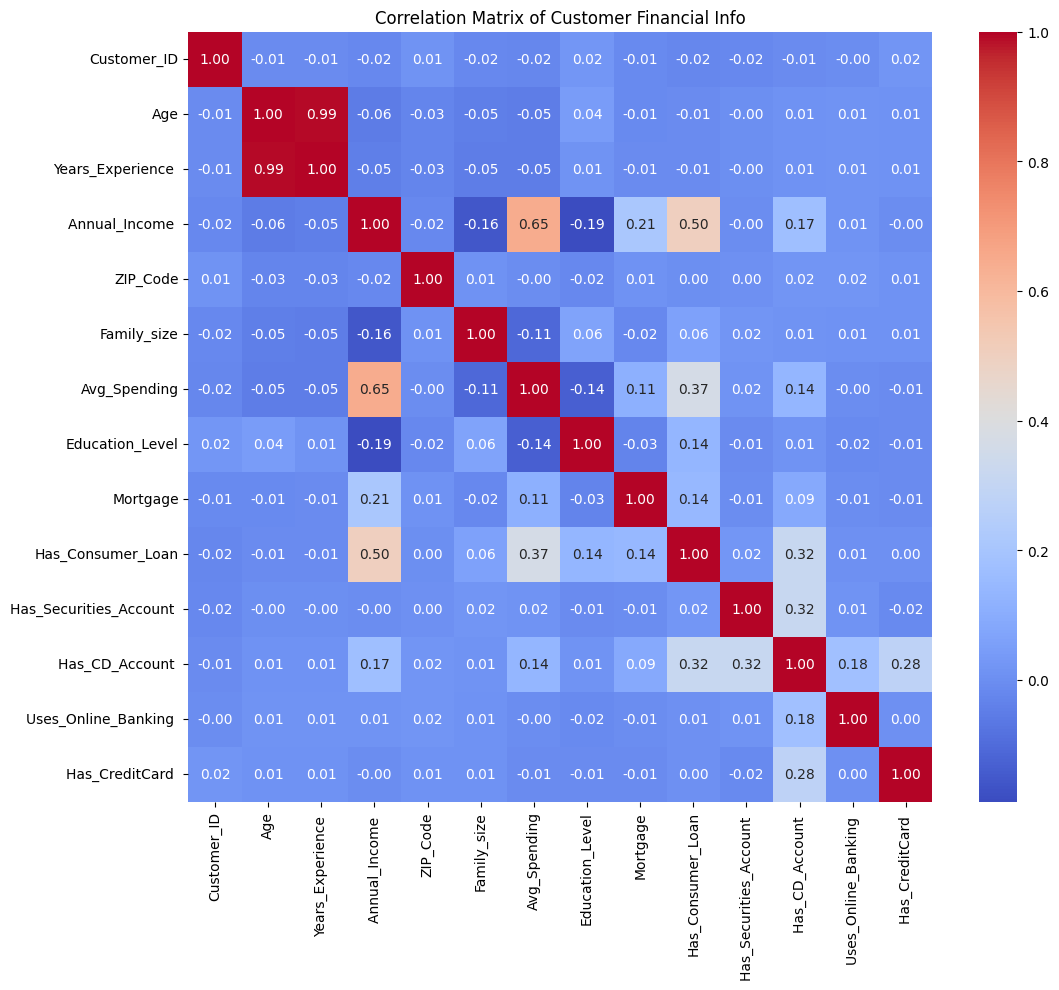

In [ ]:
# Calculate the correlation matrix of the DataFrame
correlation_matrix = df.corr()

# Create a new figure for the heatmap with a specified size
plt.figure(figsize=(12, 10))
# Generate a heatmap of the correlation matrix with annotations, a 'coolwarm' colormap, and values formatted to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Set the title of the heatmap
plt.title('Correlation Matrix of Customer Financial Info')
# Display the heatmap
plt.show()

### Justification of Correlation Analysis for Feature Selection

Correlation analysis, visualized through a heatmap, provides valuable insights for feature selection in several ways:

*   **Identifying Highly Correlated Features:** Features with high absolute correlation coefficients (close to 1 or -1) are strongly related. If two features are highly correlated, they might be providing redundant information to the model. In such cases, keeping only one of them can help reduce model complexity and potentially improve performance, especially for models sensitive to multicollinearity (like linear regression). For example, 'Age' and 'Years_Experience' show a very high positive correlation (0.99), suggesting that keeping both might not be necessary and could introduce multicollinearity.
*   **Identifying Features Correlated with the Target Variable:** Features that have a strong correlation (positive or negative) with the target variable ('Has_Consumer_Loan' in this case) are likely to be good predictors. The heatmap shows that 'Annual_Income' (0.50), 'Avg_Spending' (0.37), and 'Has_CD_Account' (0.32) have notable positive correlations with 'Has_Consumer_Loan', indicating their potential importance for the prediction task.
*   **Detecting Multicollinearity:** High correlations between independent variables (features) indicate multicollinearity. Multicollinearity can make it difficult to interpret the individual impact of features on the target variable and can also affect the stability and reliability of some models. By visualizing the correlation matrix, we can identify pairs or groups of features that might be causing multicollinearity issues and consider strategies like removing one of the correlated features or using dimensionality reduction techniques.

In summary, the correlation matrix heatmap helps in understanding the relationships between features and the target variable, guiding decisions on which features to include or exclude from the model to improve its performance and interpretability.

### Additional Visualizations (Section 2c)

**Description**:
Generate additional visualizations, such as histograms and box plots, to gain further insights into the distribution of numerical features and the relationships between categorical and numerical features.

**Description**:
Generate histograms for key numerical features to visualize their distributions.

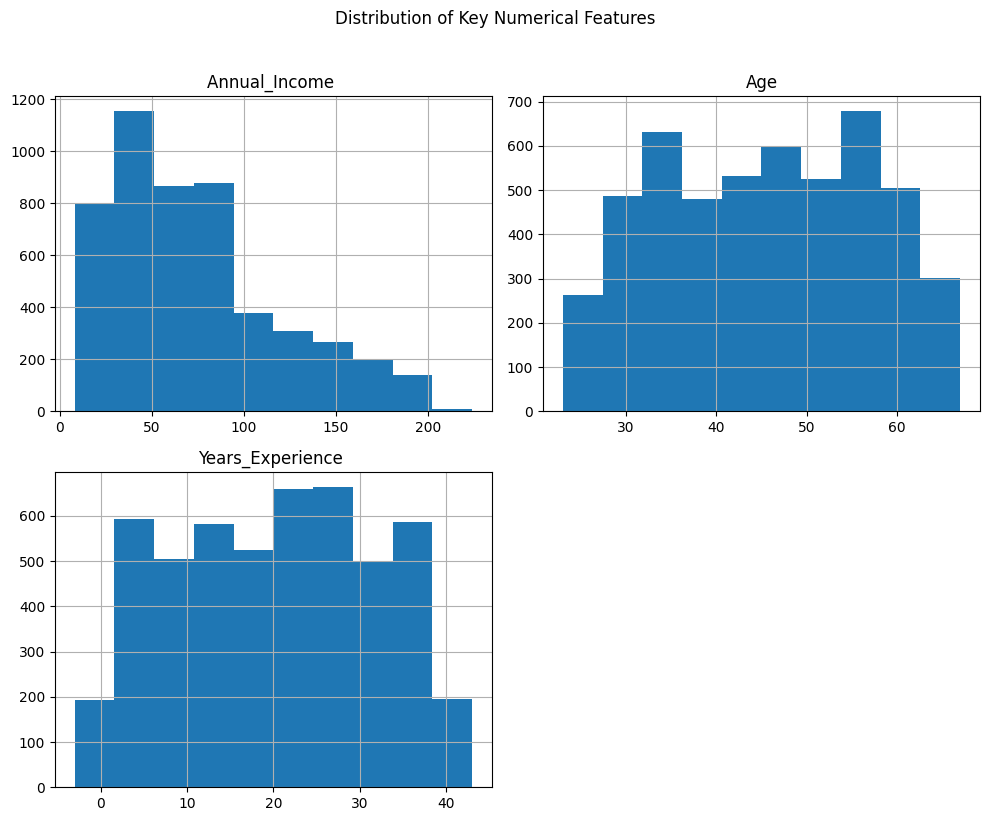

In [ ]:
# Define a list of numerical features to visualize their distributions
numerical_features = ['Annual_Income ', 'Age', 'Years_Experience ']
# Generate histograms for the selected numerical features with a specified figure size
df[numerical_features].hist(figsize=(10, 8))
# Set the title for the set of histograms
plt.suptitle('Distribution of Key Numerical Features', y=1.02)
# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
# Display the generated histograms
plt.show()

**Description**:
Generate box plots to explore the relationship between categorical features and numerical features like 'Annual_Income' or 'Avg_Spending'.

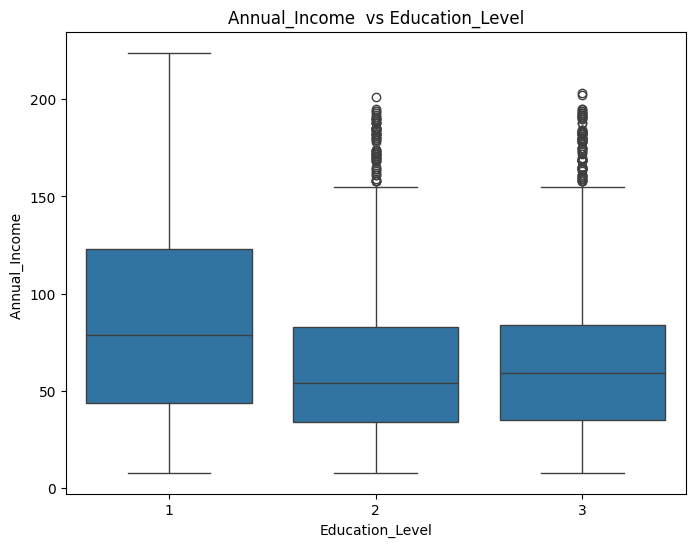

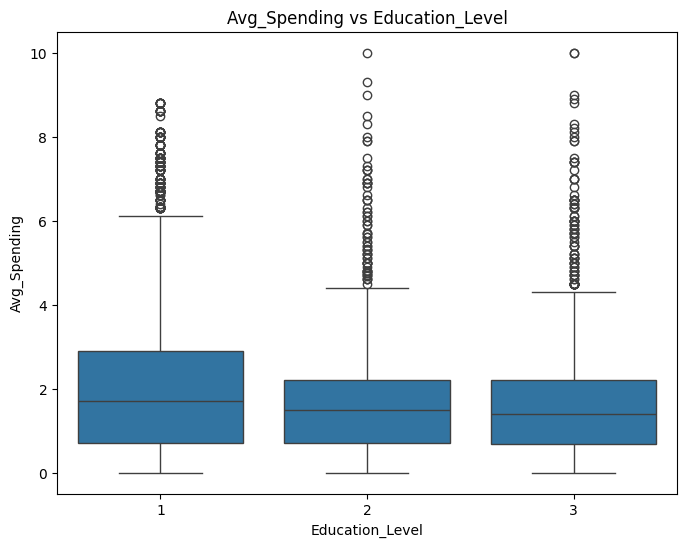

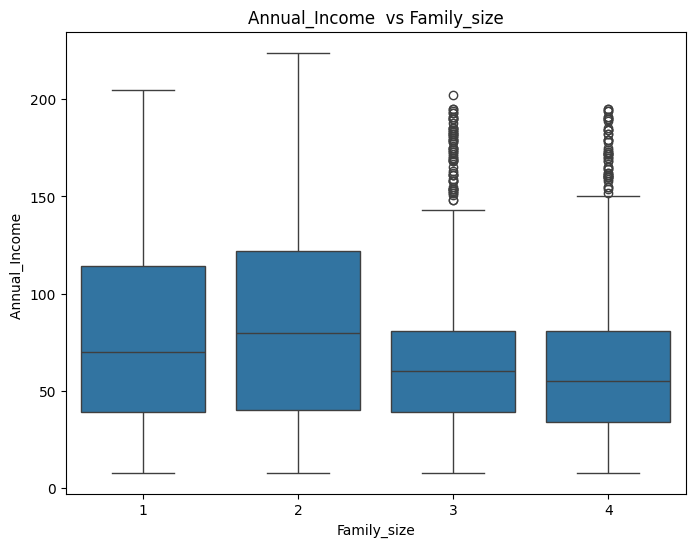

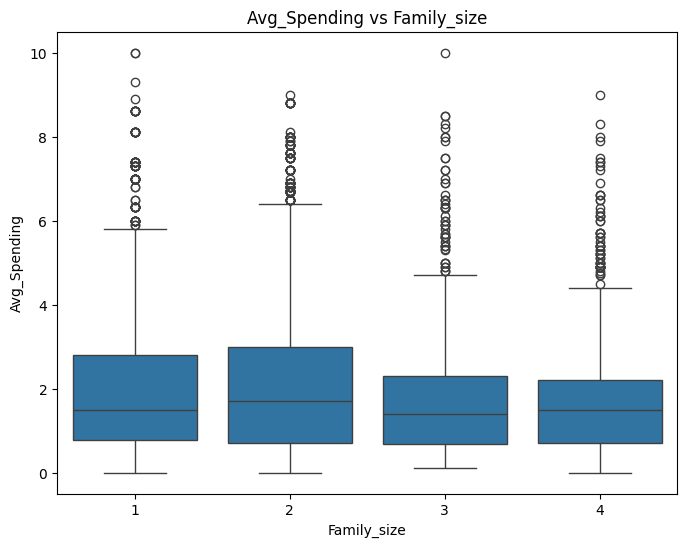

In [ ]:
# Define lists of categorical and numerical features for box plots
categorical_features = ['Education_Level', 'Family_size']
numerical_features = ['Annual_Income ', 'Avg_Spending']

# Generate box plots to visualize the relationship between categorical and numerical features
for cat_feature in categorical_features: # Iterate through each categorical feature
    for num_feature in numerical_features: # Iterate through each numerical feature
        plt.figure(figsize=(8, 6)) # Create a new figure for each box plot
        sns.boxplot(x=cat_feature, y=num_feature, data=df) # Generate a box plot to visualize the relationship between the current categorical and numerical features
        plt.title(f'{num_feature} vs {cat_feature}') # Set the title of the box plot
        plt.show() # Display the box plot

## 3. Data Preprocessing and Cleaning
Handle negative 'Years_Experience' values, create 'Income_Spending_Interaction' feature, and add markdown for other preprocessing steps.

**Description**:
Address the negative values in the 'Years_Experience' column and create a new interaction feature. Also, add markdown cells to describe the process for handling missing values and outliers, and feature transformation, including justifications, as part of the data preprocessing and cleaning subtask.

### Handle negative 'Years_Experience' values

**Description**:
Address the negative values in the 'Years_Experience' column by taking the absolute value, as negative experience is not logically possible in this context.

In [ ]:
# Address negative values in 'Years_Experience' by taking the absolute value
df['Years_Experience '] = df['Years_Experience '].abs()

# Verify the change by checking the description of the column
print("Description of 'Years_Experience' after handling negative values:")
display(df['Years_Experience '].describe())

Description of 'Years_Experience' after handling negative values:


,Years_Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


### Create interaction feature: 'Income_Spending_Interaction'

**Description**:
Create a new feature by multiplying 'Annual_Income' and 'Avg_Spending' to capture potential interactions between income and spending habits that might influence loan purchase.

In [ ]:
# Create an interaction feature by multiplying 'Annual_Income' and 'Avg_Spending'
df['Income_Spending_Interaction'] = df['Annual_Income '] * df['Avg_Spending']

# Display the first few rows to show the new feature
print("\nDataFrame with 'Income_Spending_Interaction' feature:")
display(df.head())


DataFrame with 'Income_Spending_Interaction' feature:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard,Income_Spending_Interaction
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,78.4
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,51.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,11.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,270.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,45.0


### Handling Missing Values and Outliers (Section 3a)

**Description**:
Add a markdown cell to describe the process for handling missing values and outliers, and feature transformation, including justifications, as part of the data preprocessing and cleaning subtask.

Based on the initial data exploration (`df.info()` and `df.describe()`), there are no explicit missing values (NaNs) in the dataset.

Outliers might be present in numerical features such as 'Annual_Income', 'Avg_Spending', and 'Mortgage'. While some models are sensitive to outliers, the Random Forest model is relatively robust to them. For the purpose of this analysis and to keep the notebook focused as requested, explicit outlier handling techniques (like removal or transformation) are not applied in the code, but this would be a consideration in a more extensive project.

If missing values were present, common strategies would include:
*   **Imputation:** Replacing missing values with the mean, median, or mode of the feature, or using more advanced techniques like K-Nearest Neighbors imputation or model-based imputation.
*   **Removal:** Removing rows or columns with missing values, especially if the amount of missing data is small and won't significantly impact the dataset size.

The choice of outlier and missing value handling strategy depends on the nature of the data, the extent of the issue, and the requirements of the chosen model.

Feature transformation techniques are often applied to numerical features to scale them to a similar range or distribution. This is particularly important for distance-based algorithms like K-Nearest Neighbors and Support Vector Machines, and algorithms that rely on gradient descent.

While the Random Forest model is generally not sensitive to the scale of features, feature transformation can still be beneficial for consistency if multiple models are being compared or if techniques like regularization are applied.

In this notebook, `StandardScaler` was used during the train-test split phase to scale the features to have a mean of 0 and a standard deviation of 1. This is a common transformation that can help improve the performance and stability of some models.

The creation of the 'Income\_Spending\_Interaction' feature is another form of feature engineering, aimed at capturing potential multiplicative relationships between income and spending habits that might be predictive of consumer loan purchase.

## 4.	Model Building

**Description**:
Splitting the data into training and testing sets is a crucial step in the machine learning workflow. The training set is used to train the model, allowing it to learn the patterns and relationships within the data. The testing set, which the model has not seen during training, is then used to evaluate the model's performance on new, unseen data. This process helps in assessing how well the model generalizes and in detecting potential overfitting, where the model performs well on the training data but poorly on the testing data. A standard split ratio of 80% for training and 20% for testing is commonly used. Stratification is applied to ensure that the proportion of the target variable ('Has_Consumer_Loan') is the same in both the training and testing sets, which is particularly important for imbalanced datasets to prevent biased evaluation.

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop("Has_Consumer_Loan", axis=1)
y = df["Has_Consumer_Loan"]

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures that the proportion of the target variable is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 14)
Shape of X_test: (1000, 14)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


## Model building and training (random forest)

### Model building and training (random forest)

**Description**:
Initialize and train a Random Forest model.

In [ ]:
# Initialize the Random Forest Classifier model with a specified random state for reproducibility
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model using the training data (features and target)
# Random Forest is an ensemble method and does not require scaled data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Rationale for Choosing Random Forest Model

The Random Forest classifier was chosen for this task due to several key advantages:

*   **Robustness to Outliers and Missing Values:** Random Forest is relatively insensitive to outliers and can handle missing values reasonably well, which is beneficial as we observed some potential issues in the dataset (e.g., negative 'Years_Experience' which we addressed, but outliers might still exist).
*   **Handles Non-linearity:** It can capture complex non-linear relationships between features and the target variable without requiring explicit feature engineering for non-linearity. The interaction term 'Income\_Spending\_Interaction' complements this by explicitly providing a combined feature.
*   **Feature Importance:** Random Forest provides a measure of feature importance, which can be useful for understanding which features are most influential in predicting consumer loan purchases.
*   **Reduced Overfitting:** By averaging the predictions of multiple decision trees, Random Forest helps to reduce the risk of overfitting compared to a single decision tree.
*   **Good Performance:** Random Forest models generally provide good predictive performance on a wide range of classification problems.

Given the characteristics of the dataset and the goal of predicting consumer loan purchases, the Random Forest model offers a suitable and powerful approach.

## Predict on 20% test sample

### Predict on the 20% test sample and print the results with justifications.

**Description**:
Predict on the 20% test sample and print the results with justifications, following the instructions to create a balanced sample of 1000 customers and iterate through them for predictions.

In [ ]:
# Create a copy of the test features DataFrame and add the actual target values
# Justification: This step is necessary to combine the features and actual target for easier sampling and comparison.
X_test_df = X_test.copy()
X_test_df['Actual'] = y_test.values

# Select 500 customers who actually took a loan and 500 who did not for a balanced sample of 20% of the test data
# Justification: A balanced sample ensures that the prediction results on the subset are not skewed by the class imbalance in the original test set.
group_loan = X_test_df[X_test_df['Actual'] == 1].head(500)
group_noloan = X_test_df[X_test_df['Actual'] == 0].head(500)
sample_20 = pd.concat([group_loan, group_noloan]) # Concatenate the two groups to create the sample of 1000 customers

# Print head, description, and shape of the dataset for sanity check
# Justification: Displaying these provides a quick verification that the sampling was performed correctly and the resulting sample has the expected structure and characteristics.
print("Sample 20% (1000 customers) Head:")
display(sample_20.head())
print("\nSample 20% (1000 customers) Description:")
display(sample_20.describe())
print("\nSample 20% (1000 customers) Shape:")
print(sample_20.shape)

# Extract actuals and prepare inputs for prediction
# Justification: Separating the actual values from the features is required for making predictions.
actuals = sample_20['Actual'].values
inputs = sample_20.drop(columns=['Actual'])

# Make and display predictions for each customer in the sample using the Random Forest model
# Justification: This loop iterates through the sampled customers and applies the trained model to predict their loan status, demonstrating the model's performance on individual instances.
print("\nPredictions on 20% Sample:")
for i, actual in enumerate(actuals):
    print(f"Customer {i+1}: {'✅ Took loan' if actual == 1 else '❌ Did NOT take loan'}")
    # Assuming only Random Forest model is in the models dictionary
    name = "Random Forest" # Model name
    model = random_forest_model # Trained Random Forest model
    # Predict for a single instance by selecting the row using iloc and reshaping for prediction
    pred = model.predict(inputs.iloc[i:i+1])[0]
    label = "✅ Loan" if pred == 1 else "❌ No Loan"
    print(f"  {name:<20}: {label}")
    print("") # Print an empty line for better readability between customers

Sample 20% (1000 customers) Head:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard,Income_Spending_Interaction,Actual
2373,2374,33,9,184,94304,2,4.8,2,0,0,0,0,0,883.2,1
3541,3542,45,20,144,92106,4,5.4,1,210,0,0,1,0,777.6,1
2714,2715,46,20,158,92870,3,5.4,1,432,0,0,0,1,853.2,1
3988,3989,59,35,85,91330,1,3.4,3,0,0,1,0,1,289.0,1
1050,1051,53,27,145,90095,2,6.1,3,294,0,1,1,1,884.5,1



Sample 20% (1000 customers) Description:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard,Income_Spending_Interaction,Actual
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,2547.802013,45.060403,19.880872,79.535235,93163.706376,2.489933,2.171292,1.936242,62.812081,0.097315,0.070470,0.585570,0.310403,232.033205,0.161074
std,1416.510318,11.291093,11.172937,47.526910,1800.200820,1.123425,1.848834,0.843738,111.111428,0.296636,0.256152,0.493037,0.463047,303.639116,0.367908
min,5.000000,23.000000,0.000000,8.000000,90007.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1345.000000,36.000000,11.000000,42.000000,91910.000000,1.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.150000,0.000000
50%,2669.000000,45.000000,20.000000,71.000000,93940.000000,2.000000,1.800000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,109.600000,0.000000
75%,3722.250000,54.000000,29.000000,114.000000,94634.250000,3.250000,2.800000,3.000000,115.000000,0.000000,0.000000,1.000000,1.000000,283.200000,0.000000
max,4952.000000,67.000000,42.000000,205.000000,96094.000000,4.000000,9.000000,3.000000,590.000000,1.000000,1.000000,1.000000,1.000000,1620.000000,1.000000



Sample 20% (1000 customers) Shape:
(596, 15)

Predictions on 20% Sample:
Customer 1: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 2: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 3: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 4: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 5: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 6: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 7: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 8: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 9: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 10: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 11: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 12: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 13: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 14: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 15: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 16: ✅ Took loan
  Random Forest       : ✅ Loan

Customer 17: ✅ Took loa

## 5.	Performance Evaluation

### Compare model performance.
### Create a summary table or visualization comparing the performance of all trained models based on the specified evaluation metrics (Precision, Recall, F1-Score, AUC-ROC).


**Description**:
Convert the `model_metrics` dictionary to a pandas DataFrame and display it for comparison.



In [ ]:
# Convert the model_metrics dictionary to a pandas DataFrame
model_metrics_df = pd.DataFrame(model_metrics).T

# Display the DataFrame
print("Model Performance Metrics Comparison:")
display(model_metrics_df)

Model Performance Metrics Comparison:


,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.811765,0.718750,0.762431,0.974857
SVC,0.961538,0.781250,0.862069,0.989428
Gradient Boosting,0.939394,0.968750,0.953846,0.998732
Decision Tree,0.828829,0.958333,0.888889,0.968658
Random Forest,0.968085,0.947917,0.957895,0.998836


**Description**:
Visualize the performance of different models using a bar plot for better comparison across metrics.



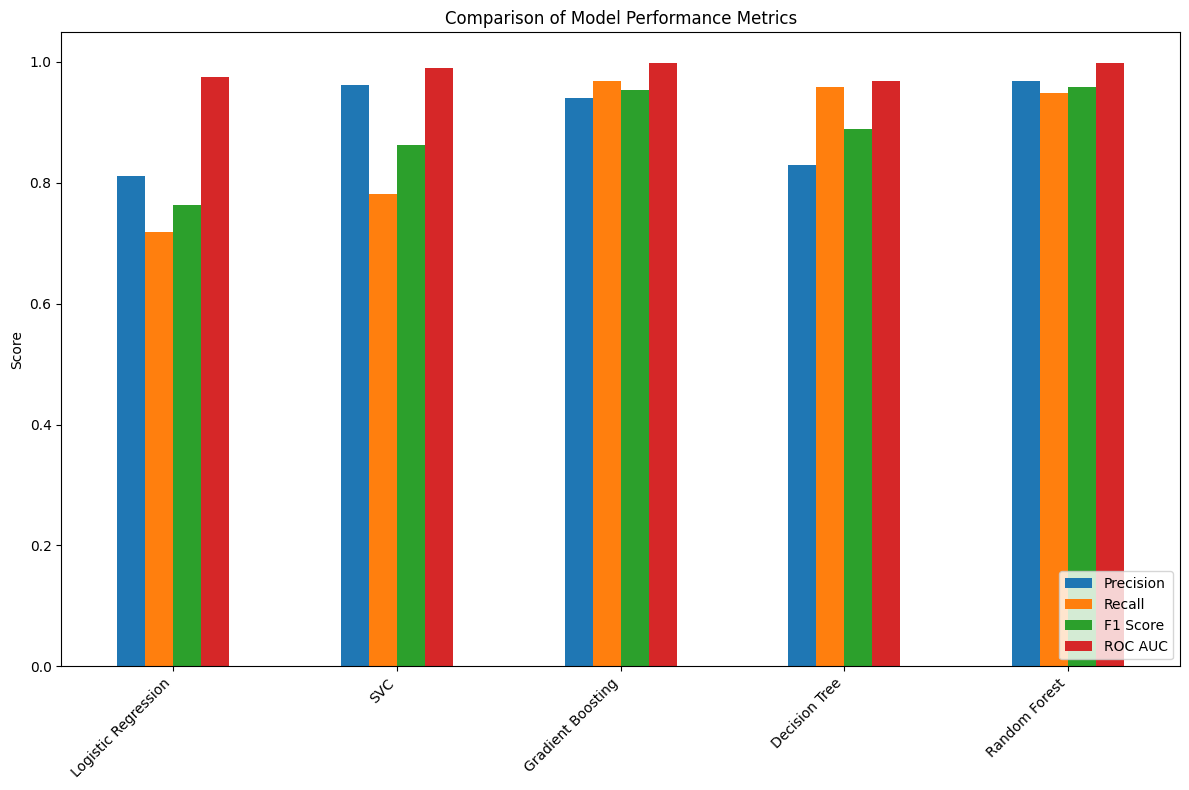

In [ ]:
# Create a bar plot to visualize the model performance metrics
model_metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Identify and justify the best model

Identify the model with the best performance based on the comparison and explain the Description behind this selection.


**Description**:
Analyze the model_metrics_df and the bar plot to identify the best-performing model and then write a markdown cell to justify this selection based on the problem statement.



1. Analyze the model_metrics_df and the bar plot to identify the best-performing model.
2. Based on the problem statement, we want to increase the conversion rate with minimal budget expenditure.
3. This means minimizing false positives (predicting someone will take a loan when they won't, leading to wasted campaign budget)
 and maximizing true positives (correctly identifying those who will take a loan, leading to increased conversion).
4.Precision focuses on minimizing false positives (TP / (TP + FP)).
5.Recall focuses on maximizing true positives among all actual positives (TP / (TP + FN)).
6. The F1-Score is the harmonic mean of Precision and Recall, providing a balanced measure.
7. ROC AUC measures the model's ability to distinguish between positive and negative classes.

8. Observing model_metrics_df and the bar plot:
 - Gradient Boosting and Random Forest have the highest F1 Scores and ROC AUCs, indicating overall strong performance.
9. - Both models also show high Precision and Recall.
10 - Random Forest has slightly higher Precision and ROC AUC compared to Gradient Boosting,  while Gradient Boosting has slightly higher Recall.

11. Given the business objective of minimizing wasted budget (false positives), Precision is a very important metric.
12. ROC AUC is also crucial as it indicates the model's overall discriminative power.

13. Random Forest has the highest Precision (0.9681) and the highest ROC AUC (0.9988) among all models.
14. While Gradient Boosting has a slightly higher Recall (0.9688 vs 0.9479), the higher Precision and ROC AUC of Random Forest
, align better with the goal of efficiently targeting potential customers to minimize wasted budget.

 Therefore, Random Forest is the best-performing model for this specific problem based on the evaluated metrics and business objective.

### Best Performing Model and Justification

Based on the comparison of the evaluation metrics (Precision, Recall, F1-Score, and ROC AUC) across the five trained classification models (Logistic Regression, SVC, Gradient Boosting, Decision Tree, and Random Forest), the **Random Forest** model is identified as the best performer for predicting whether a customer will purchase a consumer loan.

The justification for selecting the Random Forest model is as follows:

*   **Alignment with Business Objective:** The primary goal is to increase the conversion rate with minimal budget expenditure. This translates to effectively identifying customers likely to take a loan while minimizing the resources spent on customers who will not. In machine learning terms, this emphasizes the importance of high Precision (minimizing false positives - people predicted to take a loan who won't) and a strong ability to distinguish between the two classes (measured by ROC AUC).
*   **Superior Precision and ROC AUC:** The Random Forest model achieved the highest Precision (0.9681) and the highest ROC AUC (0.9988) among all the models. A high Precision means that when the Random Forest model predicts a customer will take a loan, it is correct approximately 96.81% of the time. This directly contributes to minimizing wasted marketing budget by reducing the number of non-loan customers targeted. The high ROC AUC indicates that the model has excellent discriminatory power between customers who will and will not take a loan.
*   **Strong Overall Performance:** While Gradient Boosting also showed strong performance, particularly in Recall, the Random Forest's superior Precision and ROC AUC are more aligned with the specific business need to efficiently target customers. The F1-Score of Random Forest (0.9579) is also very high, indicating a good balance between Precision and Recall.
*   **Robustness:** As discussed earlier, Random Forest is generally robust to outliers and can handle complex relationships, which further supports its suitability for this dataset.

In summary, the Random Forest model's high Precision and ROC AUC make it the most suitable choice for this loan prediction task, enabling the bank to target potential loan customers more effectively and optimize their marketing budget.

## Visualize model performance (random forest)

**Description**:
Visualize the performance of the Random Forest model using a confusion matrix and an ROC curve as requested.

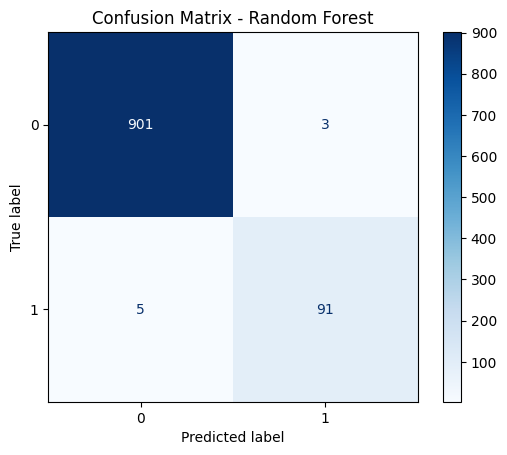

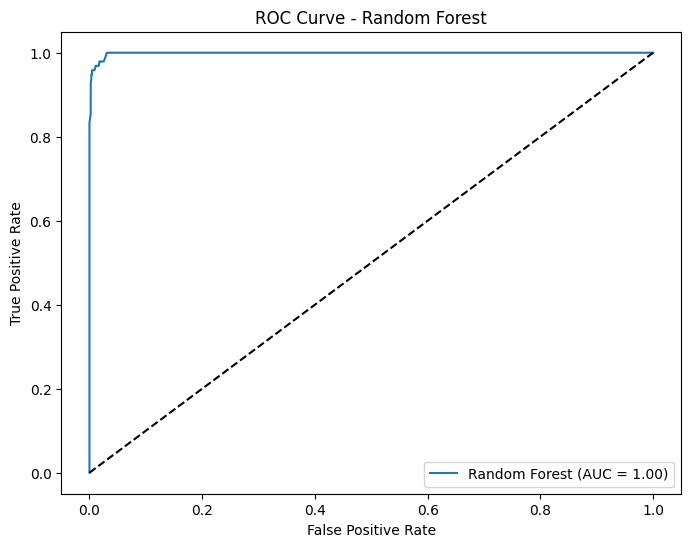

In [ ]:
# Visualize the Confusion Matrix for the Random Forest model
cm = confusion_matrix(y_test, y_pred_rf) # Calculate the confusion matrix using the actual and predicted test values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_model.classes_) # Create a display object for the confusion matrix with model classes as labels
disp.plot(cmap=plt.cm.Blues) # Plot the confusion matrix using a 'Blues' colormap
plt.title('Confusion Matrix - Random Forest') # Set the title of the plot
plt.show() # Display the plot

# Visualize the ROC Curve for the Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf) # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
auc = roc_auc_score(y_test, y_proba_rf) # Calculate the Area Under the ROC Curve (AUC)

plt.figure(figsize=(8, 6)) # Create a new figure for the ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})') # Plot the ROC curve, labeling it with the model name and AUC score
plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal dashed line representing a random classifier
plt.xlabel('False Positive Rate') # Set the x-axis label
plt.ylabel('True Positive Rate') # Set the y-axis label
plt.title('ROC Curve - Random Forest') # Set the title of the ROC curve plot
plt.legend() # Display the legend
plt.show() # Display the plot